In [ ]:
using AlgebraicStockFlow

using Catlab
using Catlab.CategoricalAlgebra
using LabelledArrays
using OrdinaryDiffEq
using Plots

using Catlab.Graphics
using Catlab.Programs
using Catlab.WiringDiagrams

# Problem:

To build the SEIRVD stock and flow diagram model:
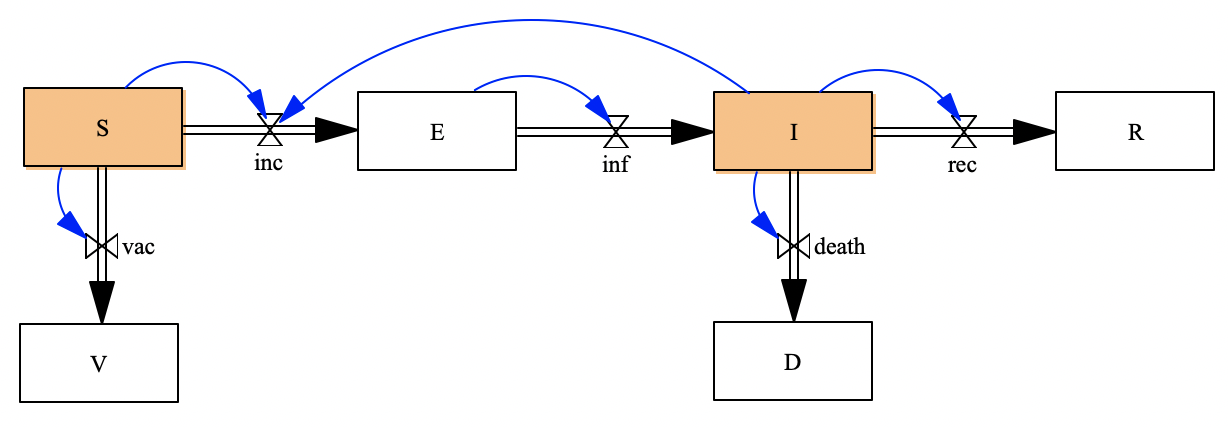
By composing three sub-components.

# Step 1: Define Stock and Flow Diagrams for the sub-components

## 1.1 Define SEIR model

Model 1: SEIR model:
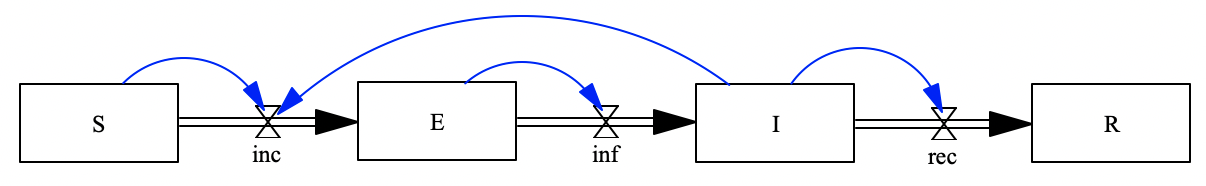

The functions of flows are given by:

In [ ]:
finc(u,p,t)=p.cβ*u.S*u.I/p.N
finf(u,p,t)=u.E * p.rlatent
frec(u,p,t)=u.I * p.rrec

Now, please define the stock and flow diagram of the SEIR model

In [ ]:
# StockAndFlowp(stocks,
#               (flow=>function, upstream=>downstream) => stocks linked)


You can plot the define stock and flow diagram by call function: Graph()

In [ ]:
Graph()

## 1.2 Define the SV model

Model 2: SV model (simulates the vaccination process):
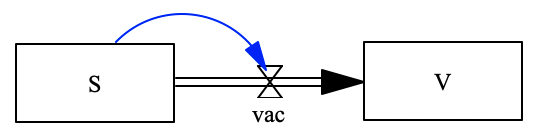

The function of flow vac is given:

In [ ]:
fvac(u,p,t)=u.S * p.rv

Now, please define the stock and flow diagram and plot it

In [ ]:
# StockAndFlowp(stocks,
#               (flow=>function, upstream=>downstream) => stocks linked)


## 1.3 Define the ID model

Model 3: ID model (simulates the deaths due to infected disese)
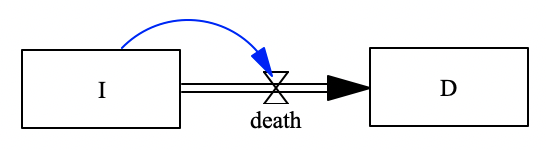

In [ ]:
fdeath(u,p,t)=u.I * p.rd

Now, please define the stock and flow diagram and plot it

In [ ]:
# StockAndFlowp(stocks,
#               (flow=>function, upstream=>downstream) => stocks linked)


# Step 2: Define the UWD-algebra composition rule

In [ ]:
uwd_seirvd = @relation (S, I) begin

end;
display_uwd(uwd_seirvd)

Apply the composition rule to the open stock and flow diagrams

In [ ]:
seirvd=oapply(uwd_seirvd,Dict()) |> apex
Graph(seirvd)

# Step 3: Solve the composed model

Define the constant parameters values, and stocks initial values. The values are given.
Please note those values are arbitrary given for toy model running. You can try to modify those 
values based on your interested infectious diseases.

In [ ]:
p = LVector(
    cβ=0.2, N=1000, rrec=0.083, rv=0.02, rlatent=0.2, rd=0.0001
)
# define initial values for stocks
u0 = LVector(
    S=990, E=0, I=10, R=0, V=0, D=0
)

Solve the ODEs generated from the composed stock and flow diagram

In [ ]:
prob = ODEProblem(vectorfield(seirvd),u0,(0.0,100.0),p);
sol = solve(prob,Tsit5(),abstol=1e-8);
plot(sol)